# BNN based Character Recognition System with PYNQ FPGA

This notebook uses Binary Neural Networks on Pynq. 

For more information about the BNN, please visit BNN PYNQ Project at Github: https://github.com/Xilinx/BNN-PYNQ

In [1]:
import bnn
print(bnn.available_params(bnn.NETWORK_LFC))

classifier = bnn.PynqBNN(network=bnn.NETWORK_LFC)
print(classifier)

['mnist', 'chars_merged']


In [15]:
import bnn
print(bnn.available_params(bnn.NETWORK_LFC))

#classifier = bnn.LfcClassifier('chars_merged')
classify = classifier.load_parameters("mnist")



['mnist', 'chars_merged']


In [17]:
classifier.class_name(class_out)

'0'

# 2. Download the network parameters
The parameters of the network are downloaded in the Programmable logic memory, storing the trained weights on the MNIST dataset. 

In [2]:
classifier.load_parameters("chars_merged")
#print(mo)

In [3]:
classifier

## 3. Load the image from the camera
The image is captured from the external USB camera and stored locally. The image is then enhanced in contract and brightness to remove background noise. 
The resulting image should show the digit on a white background:

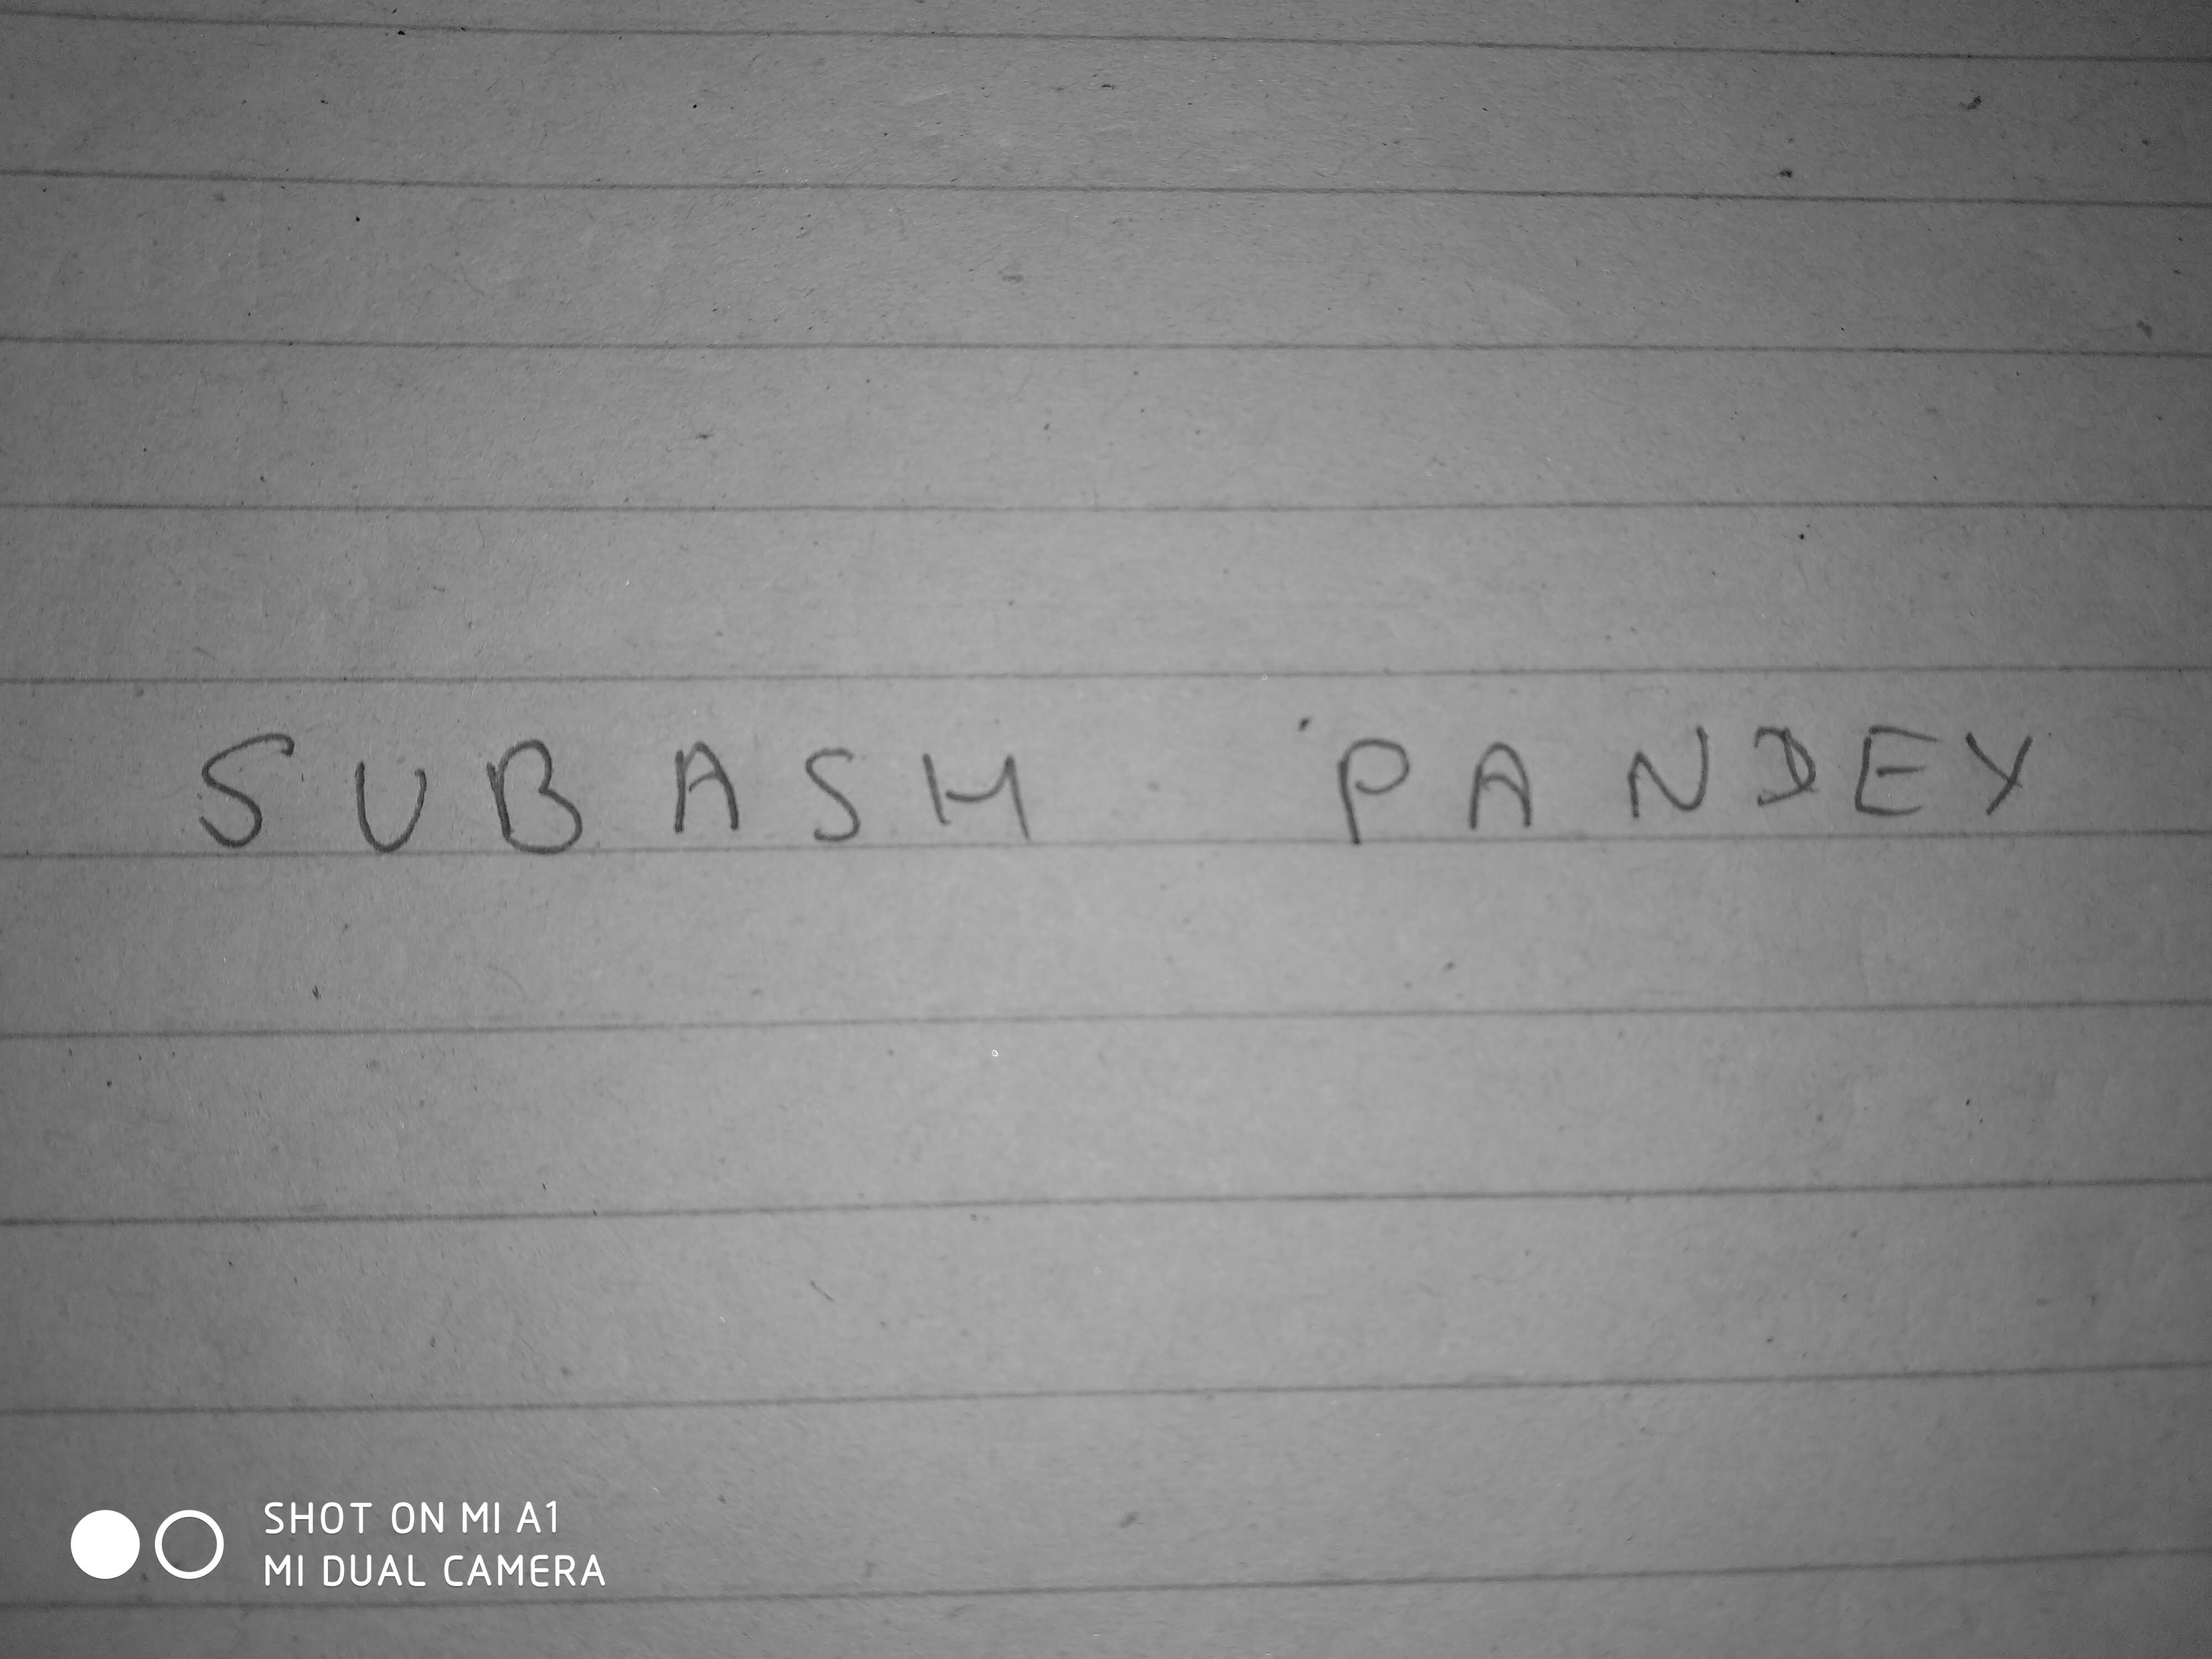

In [3]:
from PIL import Image as PIL_Image
from PIL import ImageEnhance
from PIL import ImageOps
import matplotlib.pyplot as plt
#% matplotlib inline
#orig_img_path = '/home/xilinx/image.jpg'
orig_img_path = 'IMG_20180702_183528.jpg'
!fswebcam  --no-banner --save {orig_img_path} -d /dev/video0 2> /dev/null # Loading the image from the webcam

img_o = PIL_Image.open(orig_img_path).convert("L")                          # convert in black and white  
  
#Image enhancement                  
contr = ImageEnhance.Contrast(img_o)  
img = contr.enhance(3)                                                    # The enhancement values (contrast and brightness)   
bright = ImageEnhance.Brightness(img)                                     # depends on backgroud, external lights etc  
img = bright.enhance(4.0)            

#img = img.rotate(180)                                                     # Rotate the image (depending on camera orientation)  
#Adding a border for future cropping  
img = ImageOps.expand(img,border=80,fill='white')   
threshold = 180    
img = img.point(lambda p: p > threshold and 255)   
#plt.imshow(img)
img_o
#plt.imshow(img_o)
#plt.show()

# image segmentation 


In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('50977_Rev.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
print(ret,'kklsj',thresh)
plt.imshow(thresh,cmap='gray')
plt.show()

In [ ]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)

print(unknown,'*************************************,',sure_fg)
plt.subplot(121)
plt.title('sure background')
plt.imshow(sure_bg,cmap='gray')
plt.subplot(122)
plt.title('sure foreground')
plt.imshow(sure_fg,cmap='gray')
#plt.subplot(222)
plt.title('unknown')
plt.imshow(unknown,cmap='gray')
plt.show()

In [ ]:
plt.imshow(dist_transform,cmap='gray')
plt.show()

In [ ]:
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
plt.imshow(img,cmap='gray')
plt.show()

In [ ]:
markers = cv.watershed(img,markers)
img[markers == -1] = [255,0,0]
#img = img[5:-5,5:-5,:]
plt.imshow(img)
plt.show()

# other process

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('IMG_20180702_183528.jpg')
plt.imshow(img)
plt.show()

In [ ]:

import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('IMG_20180702_183528.jpg')
mser = cv2.MSER_create()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
vis = img.copy()

regions = mser.detectRegions(gray, None)
hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions[0]]
cv2.polylines(vis, hulls, 1, (0,255,0)) 
plt.imshow(img)
plt.show()
img

# segmentation from contours

# 1

25
*****************************************************
25


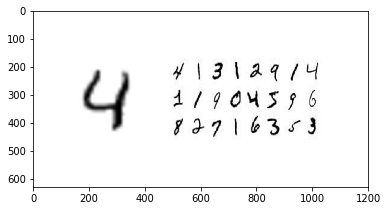

In [19]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
% matplotlib inline

#img = cv2.imread('Step-1.jpg')
#img = cv2.imread('ab_og_img.png')
#img = cv2.imread('47328818-abstract-pink-bokeh-abcdefghijklmnopqrstuvwxyz.jpg')
#img = cv2.imread('Capital Alphabet.jpg')
#img = cv2.imread('embossed_numberplate.jpg')
#img = cv2.imread('36890876_2228702687147852_8225512144557309952_n.png')
#mg = cv2.imread('IMG_20180702_183528.jpg')
#img = cv2.imread('36975135_2228768907141230_5653687986865307648_n.png')


#img = cv2.imread('2.JPG')
#img = cv2.imread('3.png')
#img =cv2.imread('images.png')
#img = cv2.imread('Illustrative-example-of-the-MNIST-handwritten-digits-In-the-upper-row-are-the-original.png')
#img = cv2.imread('4.png')
img = cv2.imread('ml-persistence-og-image.jpg')
#img = cv2.imread('7.jpg')
#img = cv2.imread('6.jpg')
#img = cv2.imread('5.jpg')
image_shape = img.shape
blur = cv2.GaussianBlur(img,(5,5),0)
gray = cv2.cvtColor(blur,cv2.COLOR_BGR2GRAY)

#im_bw = cv2.threshold(im_gray, thre, 255, cv2.THRESH_BINARY)

ret,th = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

image, contours, hierarchy = cv2.findContours(th,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

print(len(contours))
#print(gray)
print('*****************************************************')
#print(th)
sample = []
location = []
for contour in contours:
        # get rectangle bounding contour
        [x, y, w, h] = cv2.boundingRect(contour)

        #if h>20:
         #   continue
        
        # draw rectangle around contour on original image
        #cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 6)
        
        crop = img[y:y+h,x:x+w]
        c = x,y
        location.append(c)
        #sample = sample + 1
        #crop.resize(28,28)
        #classifier.class_name(crop)
        sample.append(crop)
        #print(location)
        
        #plt.imshow(crop)
        #plt.show()
print(len(sample))
plt.imshow(img)
plt.show()

In [20]:
#n = len(bnn_sample)
re = []
nbb = len(sample)
for dig in range(nbb):
    ima = sample[dig]
    image = PIL_Image.fromarray(ima)
    #ig = bnn_sample[l]
    classifier_cnv = bnn.CnvClassifier('streetview')
    class_out=classifier_cnv.classify_image(image)
    print("Class name: {0}".format(classifier_cnv.class_name(class_out)))
    le = classifier_cnv.class_name(class_out)
    re.append(le)

Inference took 1637.00 microseconds
Classification rate: 610.87 images per second
Class name: 5
Inference took 1598.00 microseconds
Classification rate: 625.78 images per second
Class name: 7
Inference took 1596.00 microseconds
Classification rate: 626.57 images per second
Class name: 3
Inference took 1597.00 microseconds
Classification rate: 626.17 images per second
Class name: 1
Inference took 1591.00 microseconds
Classification rate: 628.54 images per second
Class name: 7
Inference took 1622.00 microseconds
Classification rate: 616.52 images per second
Class name: 8
Inference took 1600.00 microseconds
Classification rate: 625.00 images per second
Class name: 3
Inference took 1599.00 microseconds
Classification rate: 625.39 images per second
Class name: 6
Inference took 1595.00 microseconds
Classification rate: 626.96 images per second
Class name: 9
Inference took 1587.00 microseconds
Classification rate: 630.12 images per second
Class name: 9
Inference took 1590.00 microseconds
Clas

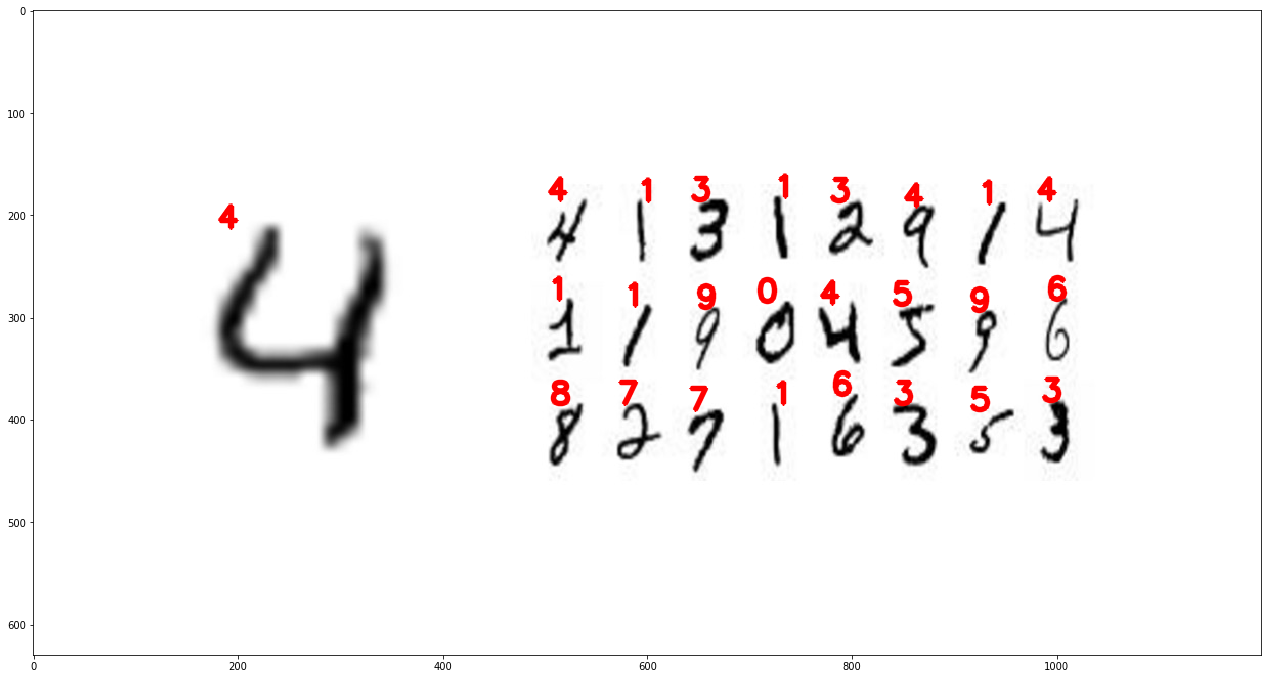

In [21]:
font = cv2.FONT_HERSHEY_SIMPLEX
nu = len(re)
for let in range(nu):
    lett = re[let]
    loc = location[let]
    cv2.putText(img,str(lett),loc,font,1,(255,0,0),3,cv2.LINE_AA)
    
plt.figure(figsize=(22,52))
plt.imshow(img)
plt.show()

# separtely

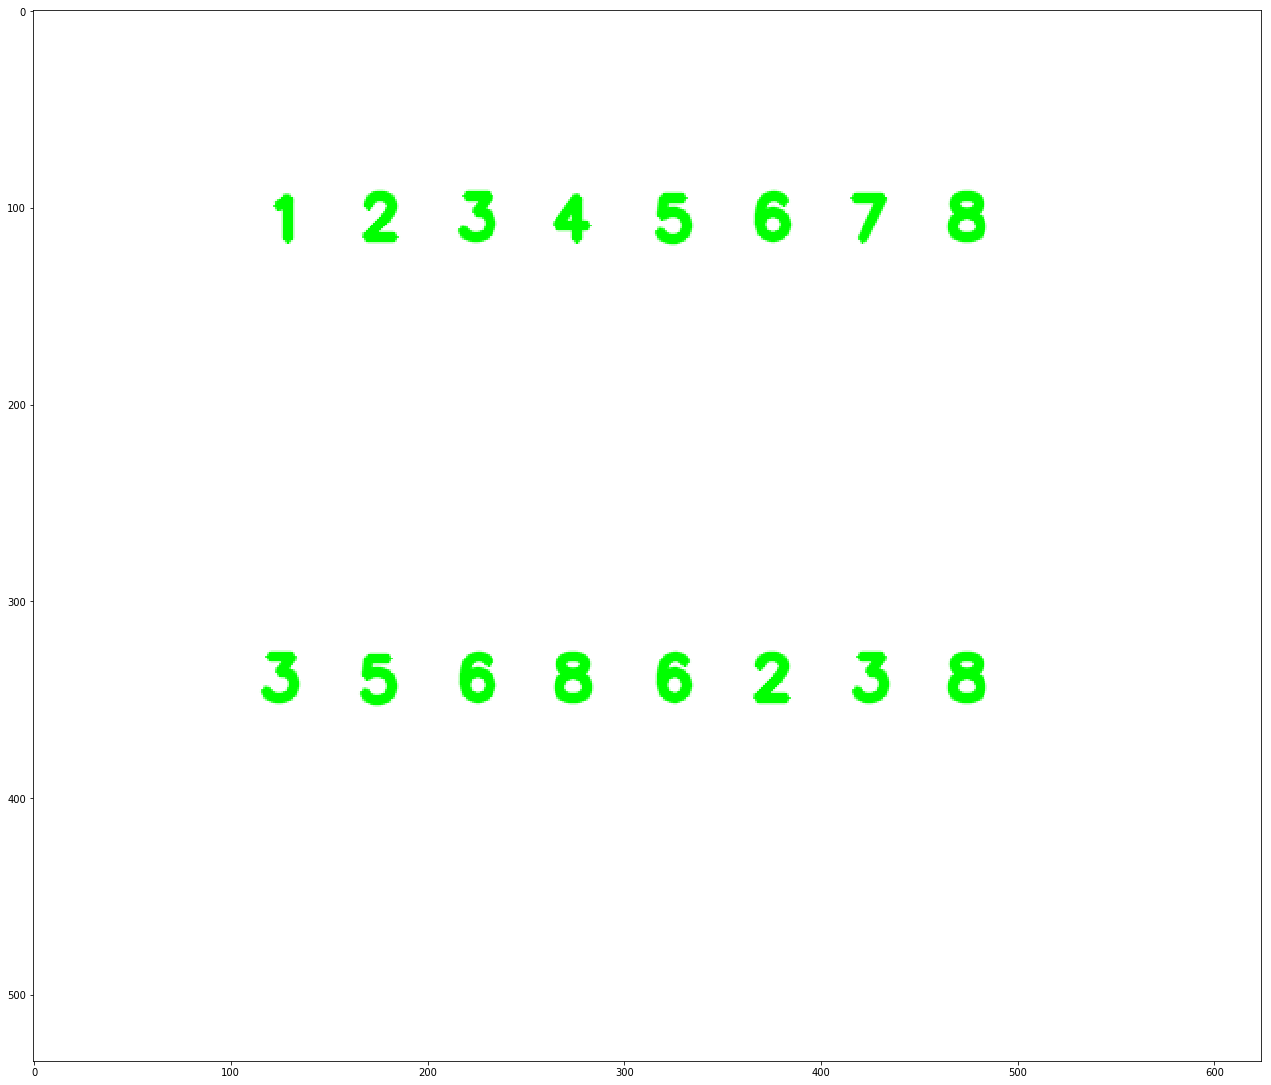

In [12]:
# separately
imge = np.ones(image_shape, dtype=np.uint8)*255
font = cv2.FONT_HERSHEY_SIMPLEX
nu = len(re)
for let in range(nu):
    lett = re[let]
    loc = location[let]
    cv2.putText(imge,str(lett),loc,font,1,(0,255,0),3,cv2.LINE_AA)
    
plt.figure(figsize=(22,52))
plt.imshow(imge)
plt.show()

In [13]:
image_shape = img.shape
image_shape

(252, 1287, 3)

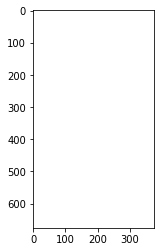

In [27]:
imge = np.ones(image_shape, dtype=np.uint8)*255
plt.imshow(imge)

In [11]:
imge.shape

(676, 376)

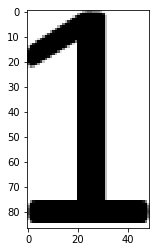

[0 0 0]


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [ 56,  56,  56],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255, 255, 255],
        [167, 167, 167],
        [ 20,  20,  20],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [ 24,  24,  24]],

       [[255, 255, 255],
        [255, 255, 255],
        [247, 247, 247],
        ...,
        [159, 159, 159],
        [191, 191, 191],
        [247, 247, 247]]

In [14]:
plt.imshow(sample[1])
plt.show()

i = sample[2]
print(i[23,23])
i

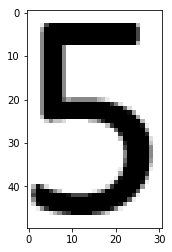

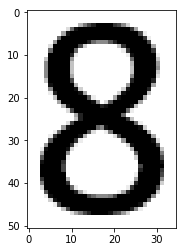

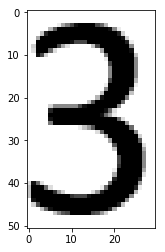

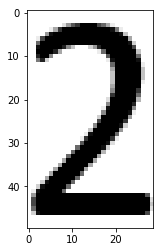

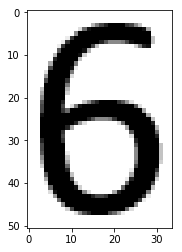

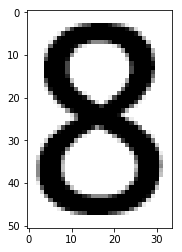

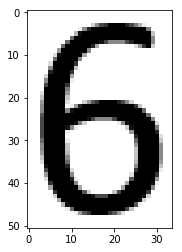

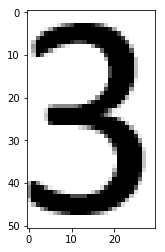

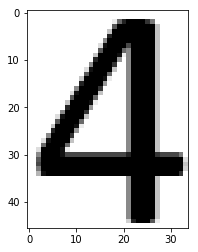

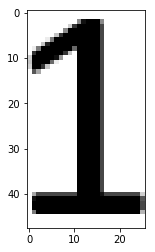

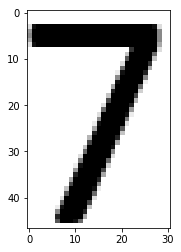

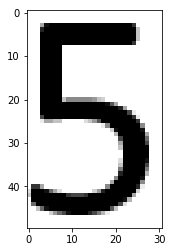

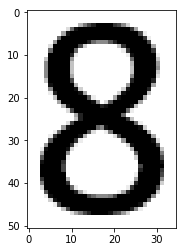

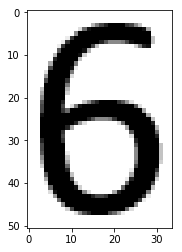

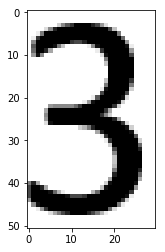

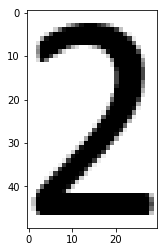

In [5]:
for dig in sample:
    
    #arr = np.array(dig)
    #print(arr.shape)
    #blur = cv2.GaussianBlur(dig,(25,25),0)
    #gray = cv2.cvtColor(blur,cv2.COLOR_BGR2GRAY)

#im_bw = cv2.threshold(im_gray, thre, 255, cv2.THRESH_BINARY)

    #ret,th = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    #th.reshape(28,28)
    #dig.resize(28,28)
    #print(th.shape)
    #classifier.class_name(th)
    plt.imshow(dig)
    plt.show()

In [34]:
for i in range(0,len(sample)):
    #print(i)
    sample[i].resize()
    print(sample[i].shape)

(87, 49, 3)
(87, 49, 3)
(87, 73, 3)
(87, 74, 3)
(88, 58, 3)
(90, 61, 3)
(90, 61, 3)


In [8]:
img


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [13]:
len(sample)

16

## 4. Crop and scale the image 

In [ ]:
from PIL import Image as PIL_Image
import numpy as np
import math
from scipy import misc

#Find bounding box  
inverted = ImageOps.invert(img)  
box = inverted.getbbox()  
img_new = img.crop(box)  
width, height = img_new.size  
ratio = min((28./height), (28./width))  
background = PIL_Image.new('RGB', (28,28), (255,255,255))  
if(height == width):  
    img_new = img_new.resize((28,28))  
elif(height>width):  
    img_new = img_new.resize((int(width*ratio),28))  
    background.paste(img_new, (int((28-img_new.size[0])/2),int((28-img_new.size[1])/2)))  
else:  
    img_new = img_new.resize((28, int(height*ratio)))  
    background.paste(img_new, (int((28-img_new.size[0])/2),int((28-img_new.size[1])/2)))  
  
background  
img_data=np.asarray(background)  
img_data = img_data[:,:,0]  
misc.imsave('/home/xilinx/img_webcam.png', img_data) 

## 5. Convert to BNN input format
The image is resized to comply with the MNIST standard. The image is resized at 28x28 pixels and the colors inverted. 

# convert the array into image

(930, 72)


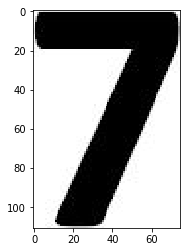

In [24]:
from PIL import Image as image
i = sample[0]
loc = location[0]
print(loc)
image = image.fromarray(i)
#i = cv2.resize(i,(28,28))
plt.imshow(image)
plt.show()

In [7]:
image
i = cv2.resize(i,(28,28))
i.shape

(28, 28, 3)

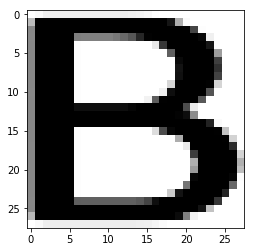

In [8]:
plt.imshow(i)
plt.show()

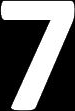

In [25]:
from array import *
from PIL import Image as PIL_Image
#img_load = PIL_Image.open('img').convert("L")
#img_load = PIL_Image.open('/home/xilinx/img_webcam.png').convert("L")  
#img_load = cv2.cvtColor(i,cv2.COLOR_BGR2GRAY)
img_load = image.convert("L")
# Convert to BNN input format  
# The image is resized to comply with the MNIST standard. The image is resized at 28x28 pixels and the colors inverted.   
#img_load
#plt.show()
#Resize the image and invert it (white on black)  
smallimg = ImageOps.invert(img_load)  
smallimg = smallimg.rotate(0)  
  
data_image = array('B')  
  
pixel = smallimg.load()  
for x in range(0,28):  
    for y in range(0,28):  
        if(pixel[y,x] == 255):  
            data_image.append(255)  
        else:  
            data_image.append(1)  
          
# Setting up the header of the MNIST format file - Required as the hardware is designed for MNIST dataset         
hexval = "{0:#0{1}x}".format(1,6)  
header = array('B')  
header.extend([0,0,8,1,0,0])  
header.append(int('0x'+hexval[2:][:2],16))  
header.append(int('0x'+hexval[2:][2:],16))  
header.extend([0,0,0,28,0,0,0,28])  
header[3] = 3 # Changing MSB for image data (0x00000803)  
data_image = header + data_image  
output_file = open('/home/xilinx/image.images-idx3-ubyte', 'wb')  
data_image.tofile(output_file)  
output_file.close()   
smallimg
#plt.imshow(smallimg)
#plt.imshow(img_load)
#plt.show()

# loop input format on BNN

# 2

In [27]:
from array import *
from PIL import Image as PIL_Image

bnn_sample = []
nbb = len(sample)
for dig in range(nbb):
    
    ima = sample[dig]
    image = PIL_Image.fromarray(ima) # convert array into image
    img_load = image.convert("L") # convert into gray scale
    
    #Resize the image and invert it (white on black)  
    smallimg = ImageOps.invert(img_load)  
    smallimg = smallimg.rotate(0) 
    
    data_image = array('B')  
  
    pixel = smallimg.load()  
    for x in range(0,28):  
        for y in range(0,28):  
            if(pixel[y,x] == 255):  
                data_image.append(255)  
            else:  
                data_image.append(1)  
          
    # Setting up the header of the MNIST format file - Required as the hardware is designed for MNIST dataset         
    hexval = "{0:#0{1}x}".format(1,6)  
    header = array('B')  
    header.extend([0,0,8,1,0,0])  
    header.append(int('0x'+hexval[2:][:2],16))  
    header.append(int('0x'+hexval[2:][2:],16))  
    header.extend([0,0,0,28,0,0,0,28])  
    header[3] = 3 # Changing MSB for image data (0x00000803)  
    data_image = header + data_image  
    output_file = open('/home/xilinx/image.images-idx3-ubyte', 'wb')  
    data_image.tofile(output_file)  
    output_file.close()   
    smallimg
    bnn_sample.append(smallimg)
    print(bnn_sample)
    #plt.imshow(smallimg)
    #plt.show()
    
    

[<PIL.Image.Image image mode=L size=28x44 at 0x27F02E30>]
[<PIL.Image.Image image mode=L size=28x44 at 0x27F02E30>, <PIL.Image.Image image mode=L size=29x45 at 0x1A67A090>]


IndexError: image index out of range

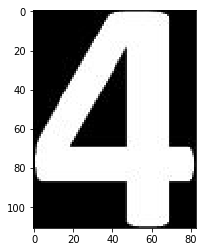

In [31]:
arr = np.array(bnn_sample[2])
plt.imshow(arr, cmap='gray')
plt.show()

In [32]:
bnn_sample[2].shape

AttributeError: 'Image' object has no attribute 'shape'

In [13]:
len(bnn_sample)

6

In [29]:
n = len(bnn_sample)
for l in range(n) :
    print(l)
    #plt.imshowbnn_sample[l]

0
1
2
3
4
5
6
7
8
9


In [11]:
from PIL import Image as image
b = bnn_sample[2]
image = image.fromarray(b)
plt.imshow(image)
plt.show()


TypeError: expected string or buffer

# 6. Launching BNN in hardware
The image is passed in the PL and the inference is performed

In [12]:
class_out= classifier.inference("/home/xilinx/image.images-idx3-ubyte")
print("Class number: {0}".format(class_out))
print("Class name: {0}".format(classifier.class_name(class_out)))

Inference took 111.00 microseconds
Classification rate: 9009.01 images per second
Class number: 0
Class name: 0


In [11]:
class_out

45

# 

In [5]:
classifier

In [26]:
classifier_cnv = bnn.CnvClassifier('streetview')
class_out=classifier_cnv.classify_image(smallimg)
print("Class name: {0}".format(classifier_cnv.class_name(class_out)))

Inference took 1601.00 microseconds
Classification rate: 624.61 images per second
Class name: 7


In [23]:
le = classifier_cnv.class_name(class_out)

In [30]:
font = cv2.FONT_HERSHEY_SIMPLEX

cv2.putText(img,str(le),loc,font,1,(255,0,0),7,cv2.LINE_AA)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

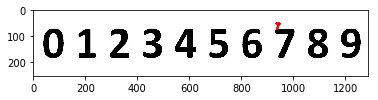

In [31]:
plt.imshow(img)
plt.show()

# LOOP PERFORMANCE

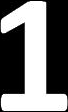

In [33]:
ig = bnn_sample[3]
ig

# 3

In [6]:
#n = len(bnn_sample)
re = []
nbb = len(sample)
for dig in range(nbb):
    ima = sample[dig]
    image = PIL_Image.fromarray(ima)
    #ig = bnn_sample[l]
    classifier_cnv = bnn.CnvClassifier('streetview')
    class_out=classifier_cnv.classify_image(image)
    print("Class name: {0}".format(classifier_cnv.class_name(class_out)))
    le = classifier_cnv.class_name(class_out)
    re.append(le)

Inference took 1593.00 microseconds
Classification rate: 627.75 images per second
Class name: 5
Inference took 1583.00 microseconds
Classification rate: 631.71 images per second
Class name: 8
Inference took 1622.00 microseconds
Classification rate: 616.52 images per second
Class name: 3
Inference took 1613.00 microseconds
Classification rate: 619.96 images per second
Class name: 2
Inference took 1618.00 microseconds
Classification rate: 618.05 images per second
Class name: 6
Inference took 1616.00 microseconds
Classification rate: 618.81 images per second
Class name: 8
Inference took 1630.00 microseconds
Classification rate: 613.50 images per second
Class name: 6
Inference took 1618.00 microseconds
Classification rate: 618.05 images per second
Class name: 3
Inference took 1629.00 microseconds
Classification rate: 613.87 images per second
Class name: 7
Inference took 1626.00 microseconds
Classification rate: 615.01 images per second
Class name: 5
Inference took 1629.00 microseconds
Clas

In [11]:
re

['5', '8', '3', '2', '6', '8', '6', '3', '4']

# written on image

# 4

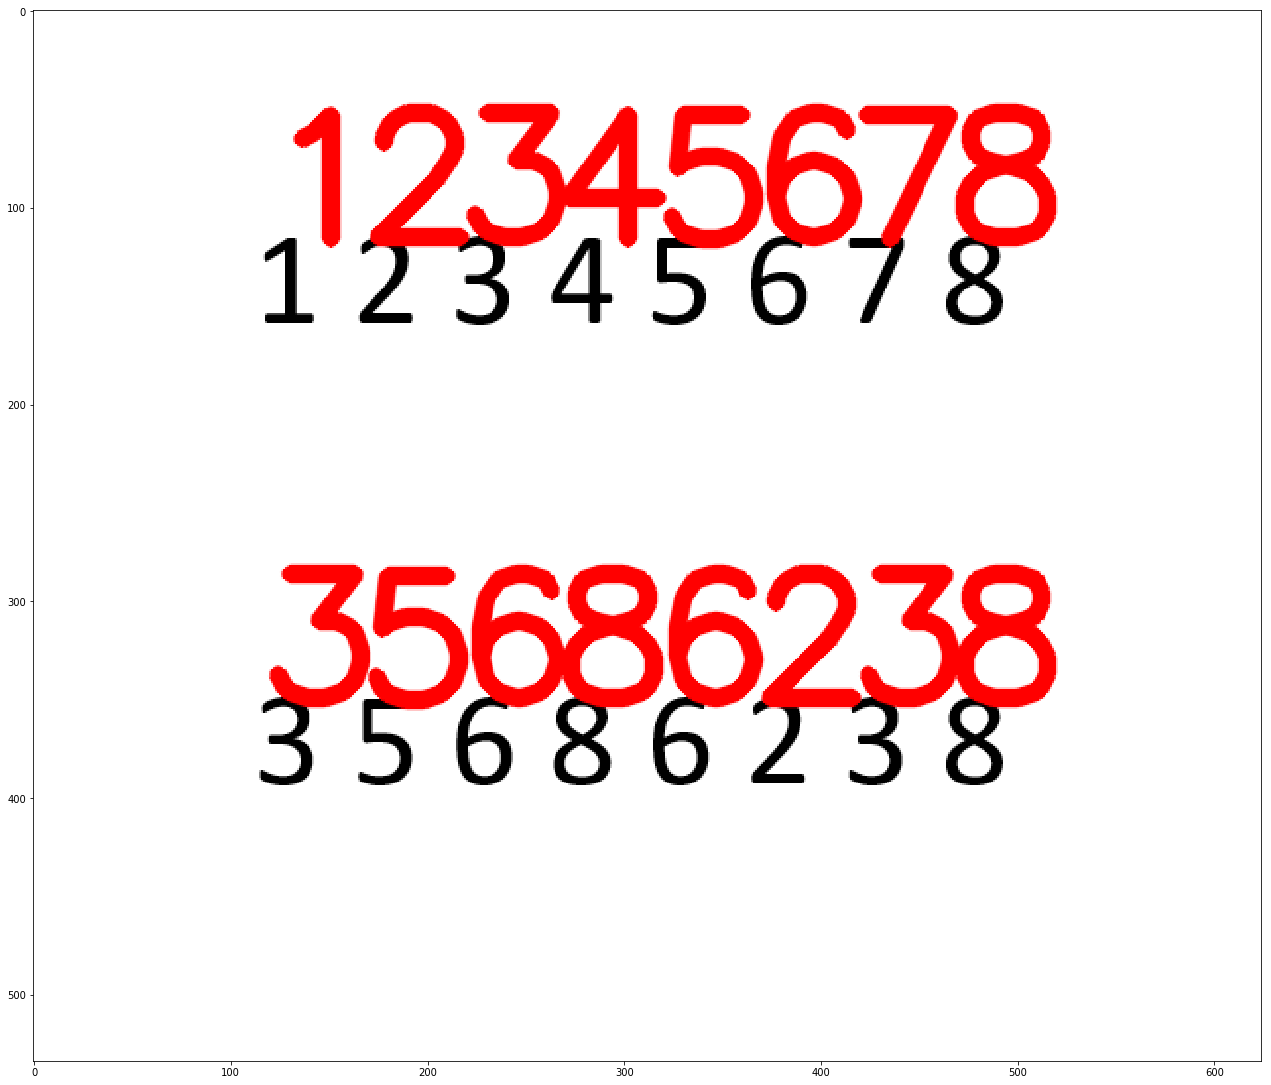

In [7]:
font = cv2.FONT_HERSHEY_SIMPLEX
nu = len(re)
for let in range(nu):
    lett = re[let]
    loc = location[let]
    cv2.putText(img,str(lett),loc,font,3,(255,0,0),7,cv2.LINE_AA)
    
plt.figure(figsize=(22,52))
plt.imshow(img)
plt.show()

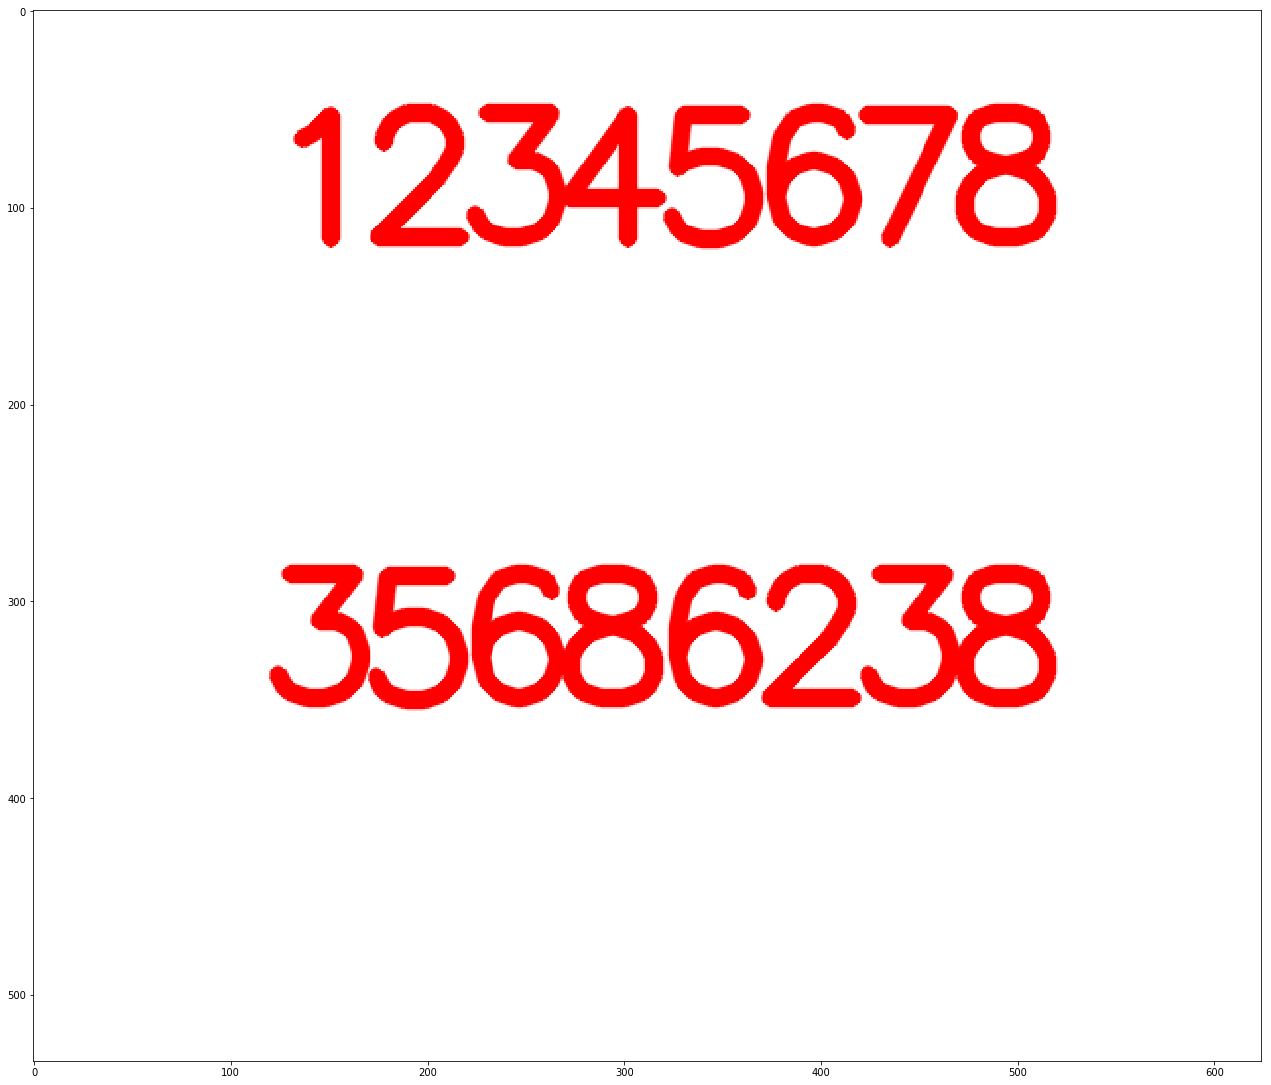

In [8]:
# separately
imge = np.ones(image_shape, dtype=np.uint8)*255
font = cv2.FONT_HERSHEY_SIMPLEX
nu = len(re)
for let in range(nu):
    lett = re[let]
    loc = location[let]
    cv2.putText(imge,str(lett),loc,font,3,(255,0,0),7,cv2.LINE_AA)
    
plt.figure(figsize=(22,52))
plt.imshow(imge)
plt.show()

# 5

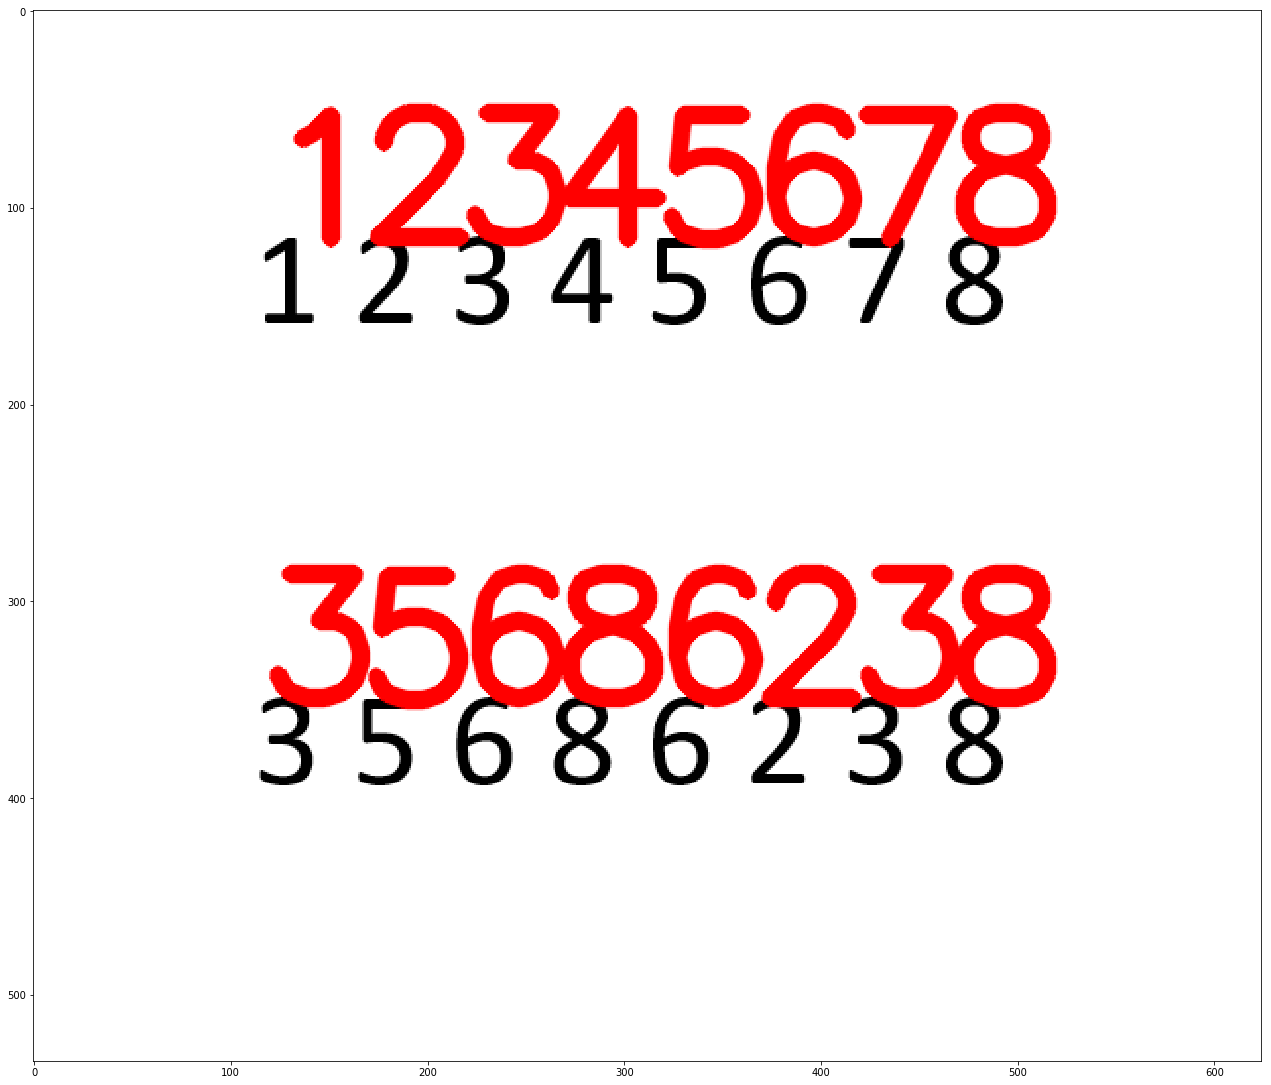

In [33]:
plt.figure(figsize=(22,52))
plt.imshow(img)
plt.show()

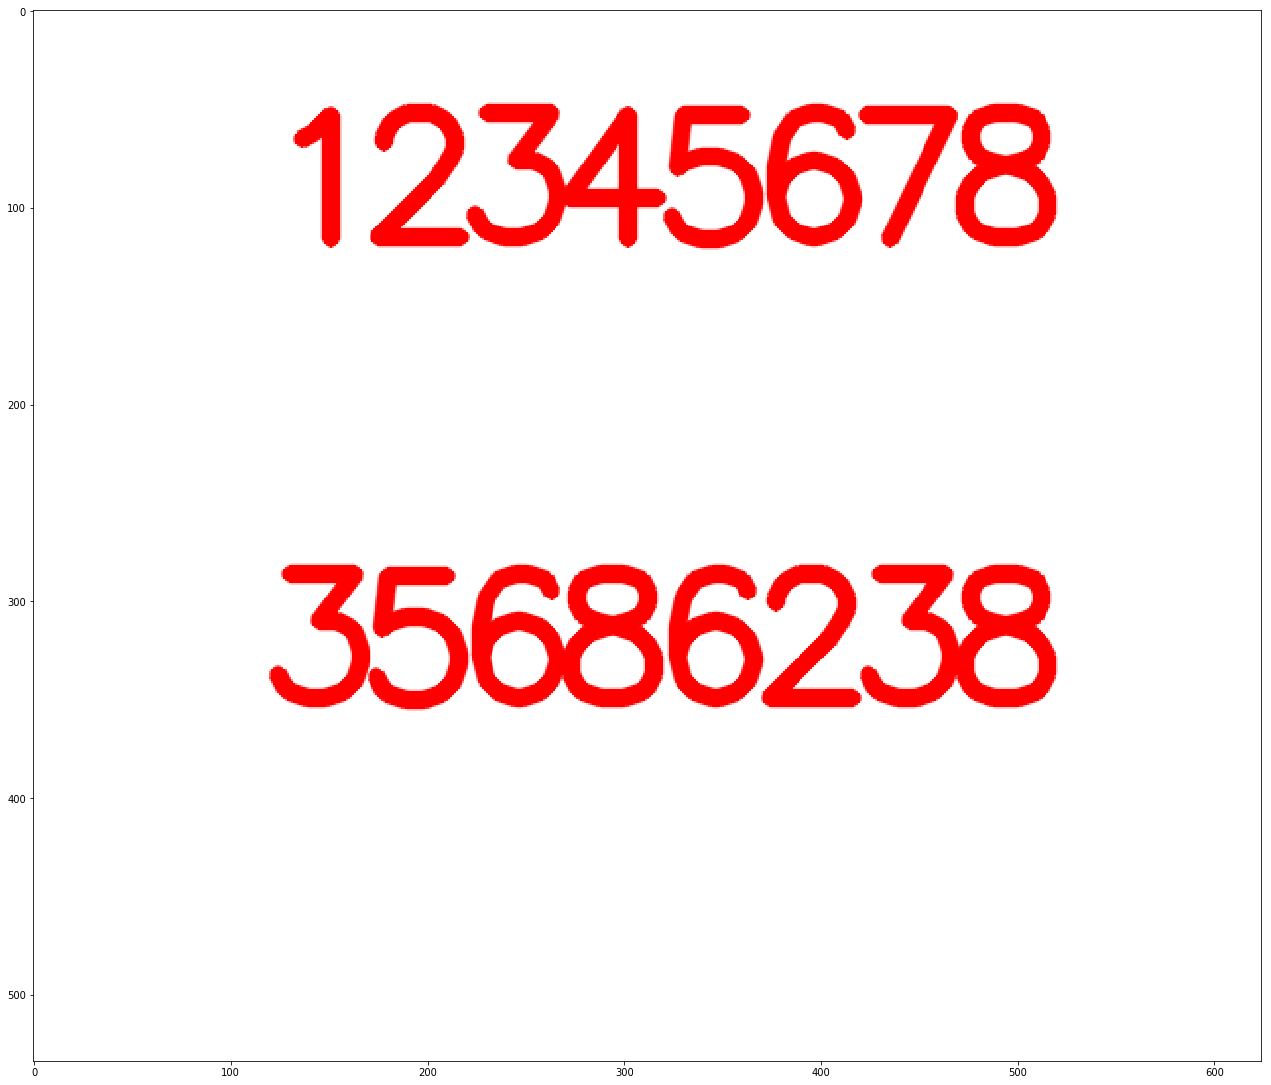

In [35]:
plt.figure(figsize=(22,52))
plt.imshow(imge)
plt.show()

In [17]:
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

(930, 72)


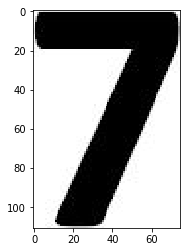

(678, 72)


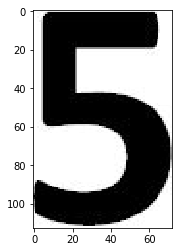

(545, 72)


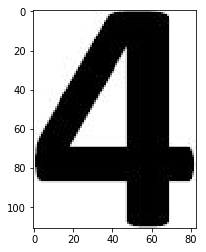

(174, 71)


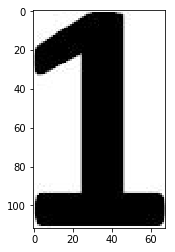

(1183, 70)


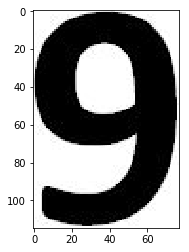

(1056, 70)


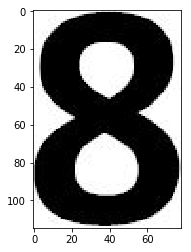

(803, 70)


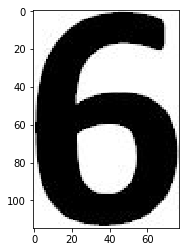

(423, 70)


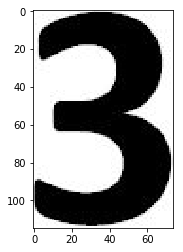

(296, 70)


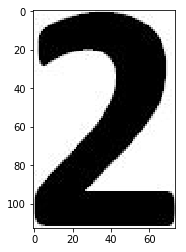

(39, 70)


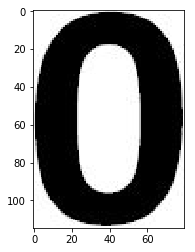

In [47]:
for i in range(len(location)):
    print(location[i])
    plt.imshow(sample[i])
    plt.show()